**To dos**:
- Add boxplots(Teresa)
- Add corr matrix (Carlos)
- Check MICE imputation (Hossein)
- Pipelines from deployment class (Carlos)
- confission matrix with heat map (Hossein)
- bayessian optimization for hyperparm tuning (Hossein)
- explain the feature importance part (Mandana explain how to interpret).Hossein will research on bar plots for the feature importance. (Hossein will do research on this first)

# Libraries importing

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import shap

# 📥 Dataset Loading

In [9]:
# Install the UCI ML Repo package to access datasets
!pip install ucimlrepo

In [10]:
# Import fetch function to load the dataset
from ucimlrepo import fetch_ucirepo

# Fetch the Dermatology dataset using its ID (33) from UCI repository
dermatology = fetch_ucirepo(id=33)

# Extract features and target from the dataset as pandas DataFrames
X = dermatology.data.features  # Clinical & histopathological features
y = dermatology.data.targets   # Disease class (target variable)


# Exploratory Data Analysis (EDA)

In [11]:
# Convert y dataframe to a series
y = y.iloc[:, 0]  # Select the first column if y is a DataFrame

# Check the target values
print("\nUnique class labels:", y.unique())


Unique class labels: [2 1 3 5 4 6]


In [12]:
# Check for missing values
print("\nMissing values in features:\n", X.isnull().sum())
print("\nMissing values in target:\n", y.isnull().sum())


Missing values in features:
 erythema                                       0
scaling                                        0
definite-borders                               0
itching                                        0
koebner phenomenon                             0
polygonal papules                              0
follicular papules                             0
oral-mucosal involvement                       0
knee elbow involvement                         0
scalp involvement                              0
family history                                 0
melanin incontinence                           0
eosinophils in the infiltrate                  0
pnl infiltrate                                 0
fibrosis of the papillary dermis               0
exocytosis                                     0
acanthosis                                     0
hyperkeratosis                                 0
parakeratosis                                  0
clubbing of the rete ridges            

In [13]:
# Verifying nulls in the "age" feature since the UCI description mentioned it, and I already saw 8 missing values with isnull().sum().
X[X['age'].isnull()]

,erythema,scaling,definite-borders,itching,koebner phenomenon,polygonal papules,follicular papules,oral-mucosal involvement,knee elbow involvement,scalp involvement,...,focal hypergranulosis,disappearance of the granular layer,vacuolisation and damage of the basal layer,spongiosis,saw-tooth appearance of retes,follicular horn plug,perifollicular parakeratosis,inflammatory monoluclear infiltrate,band-like infiltrate,age
33,2,2,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,NaN
34,2,1,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
35,2,2,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
36,2,1,2,3,2,3,0,2,0,0,...,1,0,2,0,2,0,0,0,3,NaN
262,2,1,0,2,0,0,0,0,0,0,...,0,0,0,2,0,0,0,3,0,NaN
263,1,1,1,3,0,0,0,0,0,0,...,0,0,0,3,0,0,0,2,0,NaN
264,1,1,0,2,0,0,0,0,1,0,...,0,0,0,2,0,0,0,3,0,NaN
265,1,1,0,3,0,0,0,0,0,0,...,0,0,0,2,0,0,0,3,0,NaN


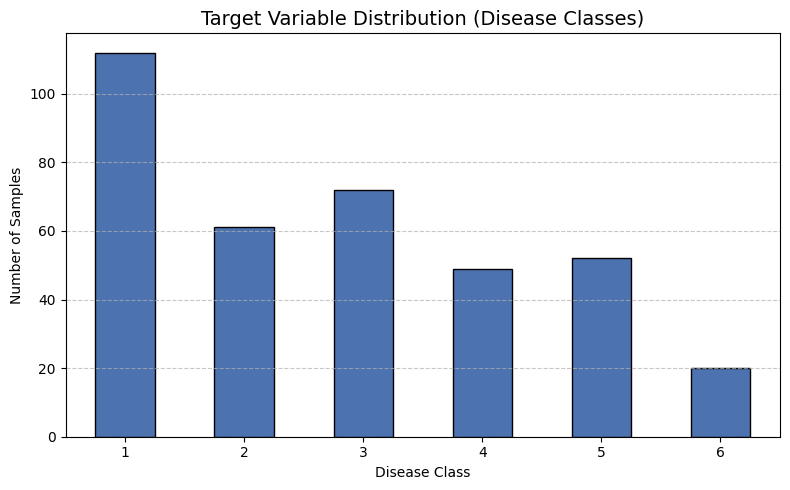

class
1    112
2     61
3     72
4     49
5     52
6     20
Name: count, dtype: int64


In [14]:
# Check distribution of target variable (y)
plt.figure(figsize=(8, 5))
y.value_counts().sort_index().plot(kind='bar', color="#4C72B0", edgecolor="black")

plt.title("Target Variable Distribution (Disease Classes)", fontsize=14)
plt.xlabel("Disease Class")
plt.ylabel("Number of Samples")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print actual counts
print(y.value_counts().sort_index())

In [15]:
# Display unique values for each feature to better understand categorical encoding and value ranges
print("Unique values from each feature:")

for col in X.columns:
    print(f"{col}: {X[col].unique()}")


Unique values from each feature:
erythema: [2 3 1 0]
scaling: [2 3 1 0]
definite-borders: [0 3 2 1]
itching: [3 2 0 1]
koebner phenomenon: [0 1 2 3]
polygonal papules: [0 3 2 1]
follicular papules: [0 3 1 2]
oral-mucosal involvement: [0 3 2 1]
knee elbow involvement: [1 0 3 2]
scalp involvement: [0 1 2 3]
family history: [0 1]
melanin incontinence: [0 1 2 3]
eosinophils in the infiltrate: [0 2 1]
pnl infiltrate: [0 1 3 2]
fibrosis of the papillary dermis: [0 3 1 2]
exocytosis: [3 1 0 2]
acanthosis: [2 3 1 0]
hyperkeratosis: [0 2 1 3]
parakeratosis: [0 2 3 1]
clubbing of the rete ridges: [0 2 1 3]
elongation of the rete ridges: [0 2 3 1]
thinning of the suprapapillary epidermis: [0 2 3 1]
spongiform pustule: [0 2 1 3]
munro microabcess: [0 1 2 3]
focal hypergranulosis: [0 2 3 1]
disappearance of the granular layer: [0 3 2 1]
vacuolisation and damage of the basal layer: [0 2 3 1]
spongiosis: [3 0 2 1]
saw-tooth appearance of retes: [0 2 3 1]
follicular horn plug: [0 1 2 3]
perifollicular

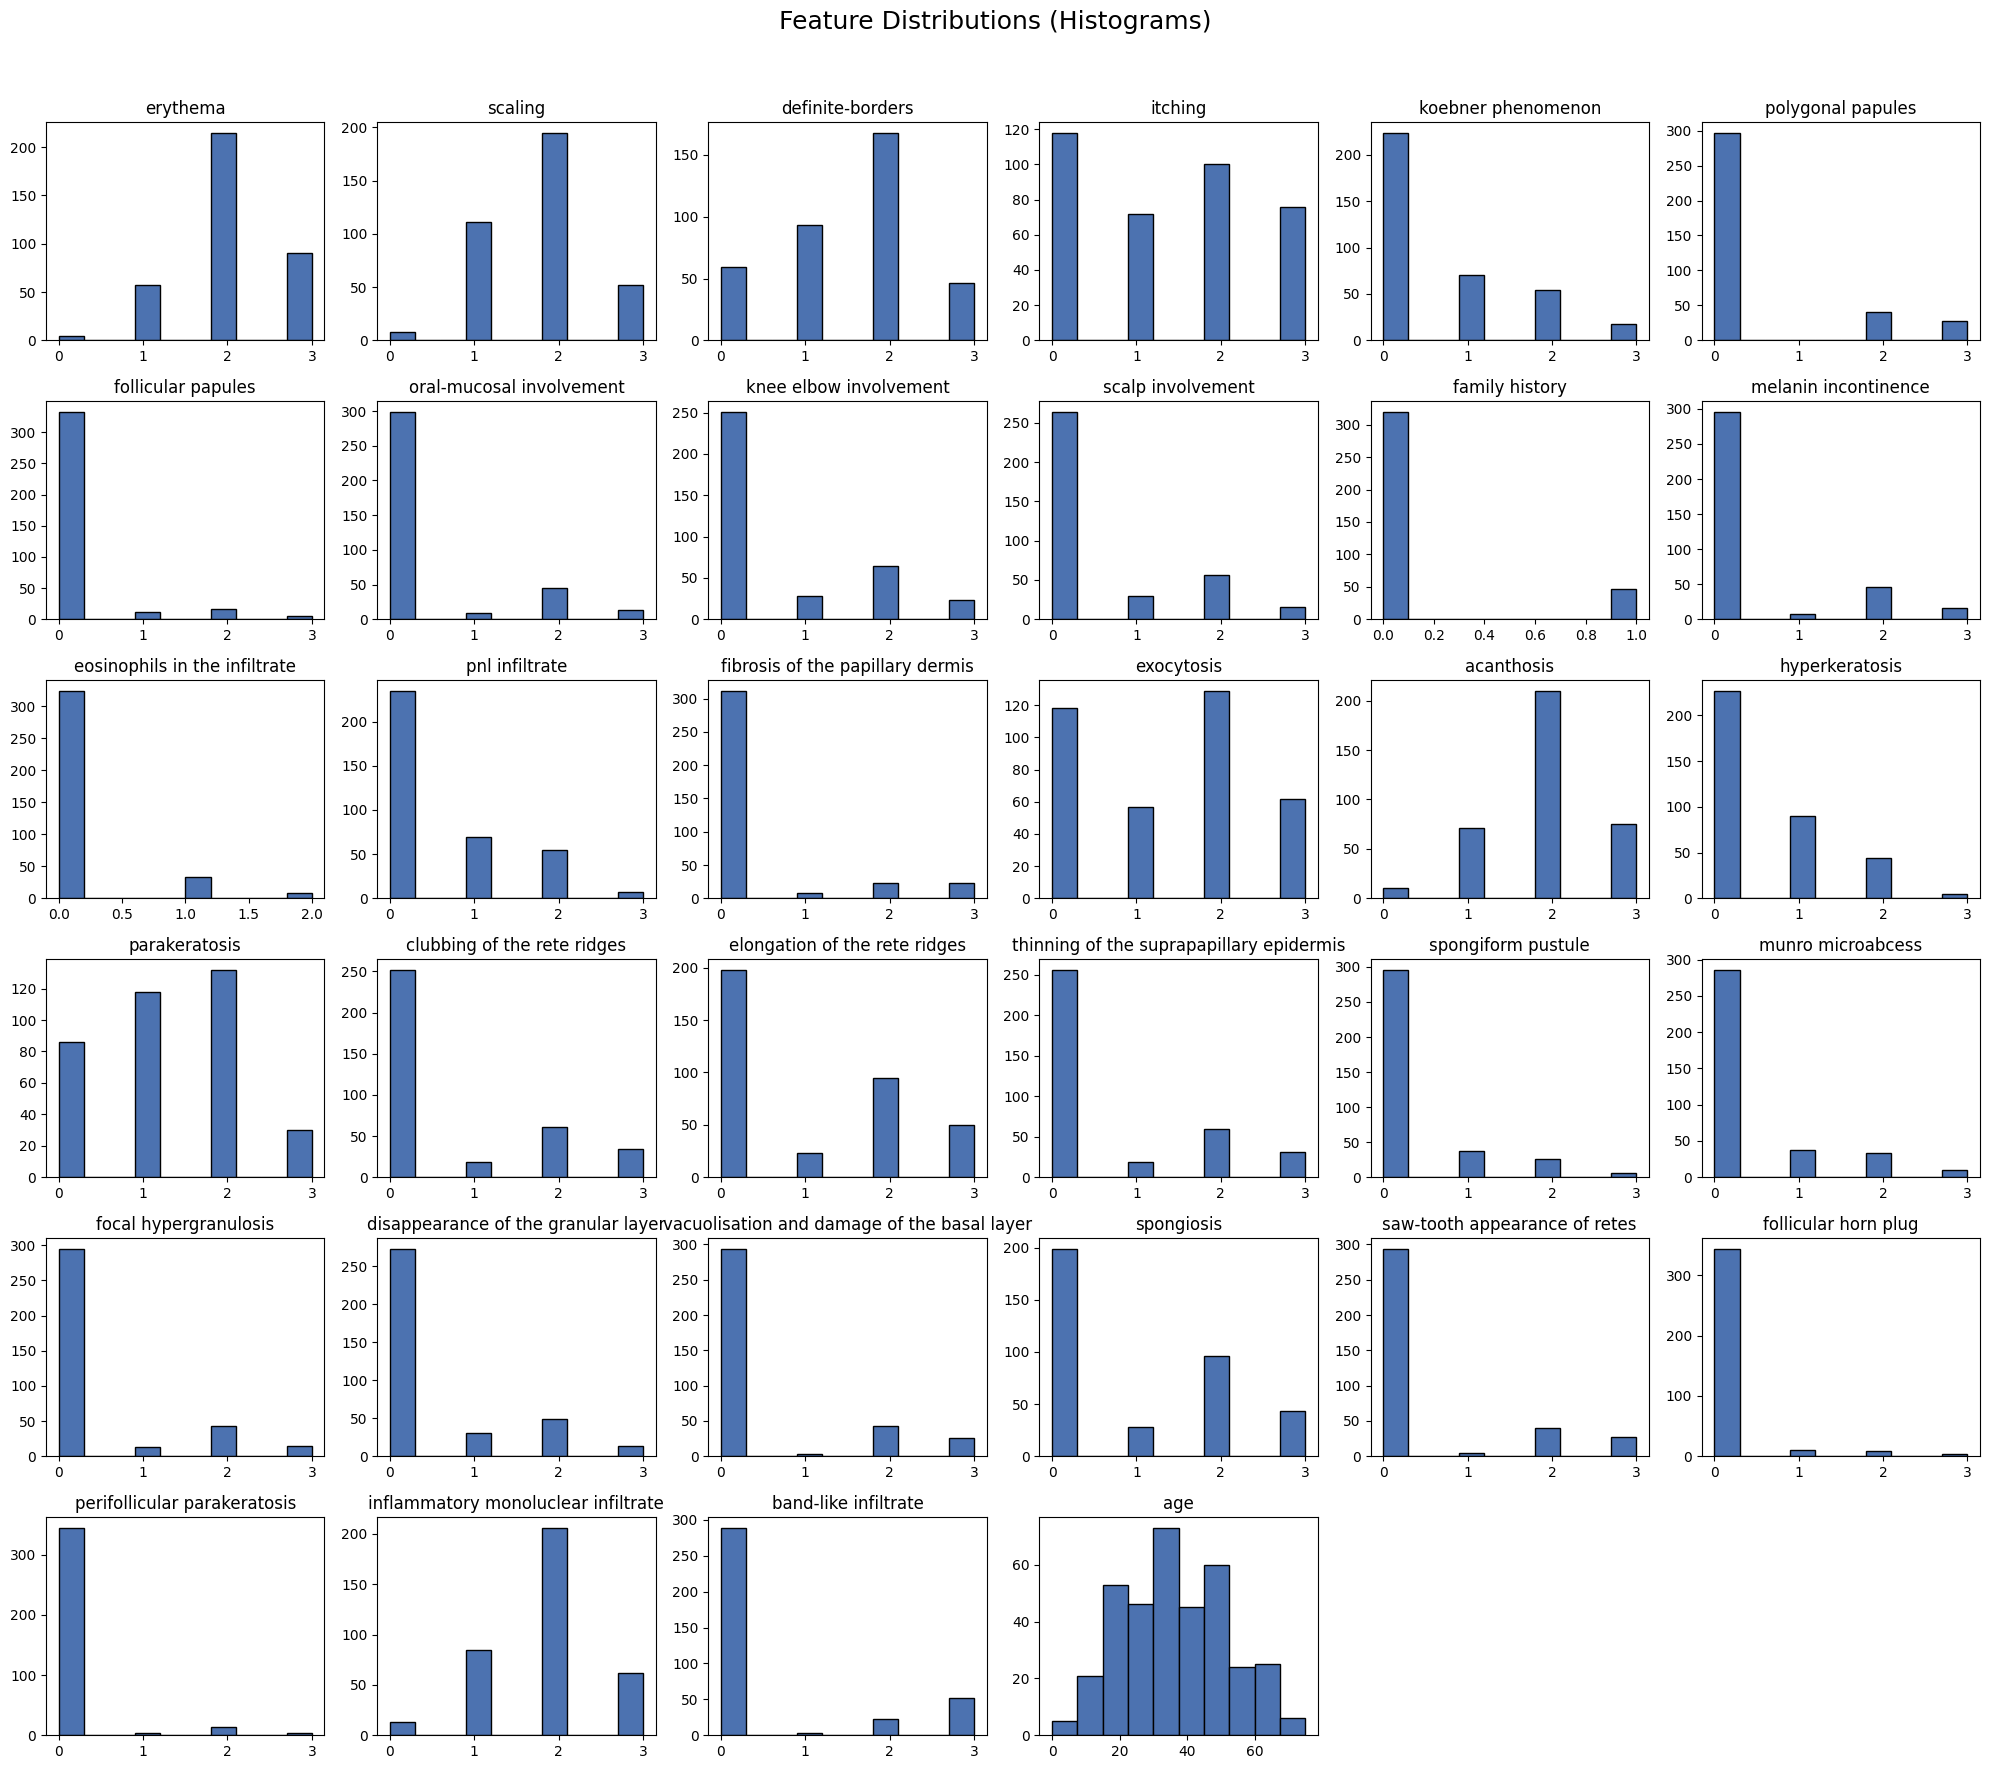

In [16]:
# Plotting histograms to quickly check how each feature is distributed.
X.hist(
    figsize=(20, 18),
    bins=10,
    color='#4C72B0',
    edgecolor='black',
    grid=False,
    layout=(6, 6)  # control grid layout manually
)
plt.suptitle("Feature Distributions (Histograms)", fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # prevents overlap with title
plt.show()

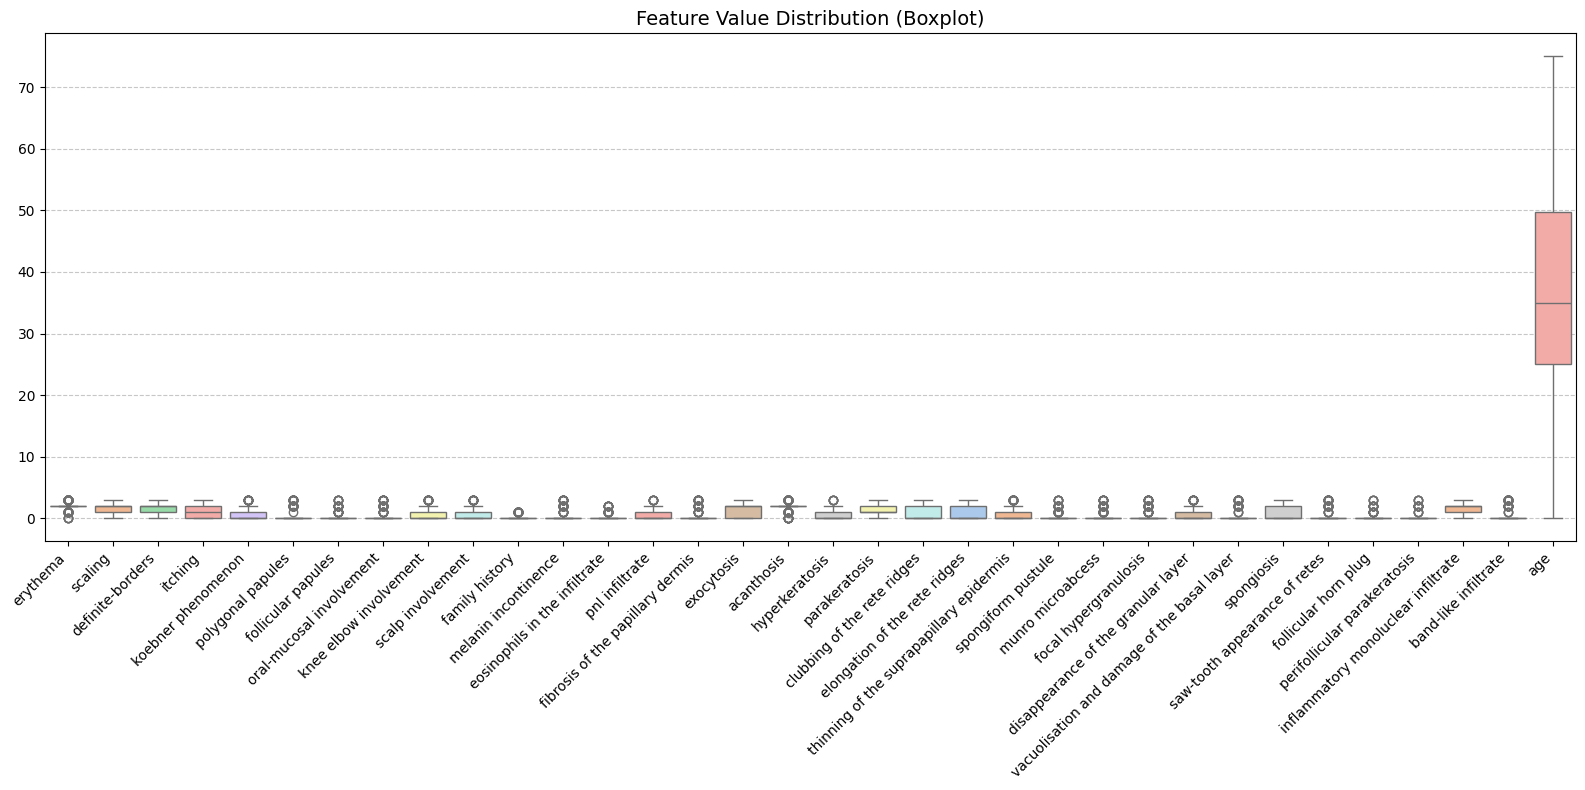

In [17]:
# Using a boxplot to spot outliers and distribution patterns across all features.
plt.figure(figsize=(16, 8))
sns.boxplot(data=X, palette="pastel")
plt.xticks(rotation=45, ha="right")  # Angled rotation for better readability
plt.title("Feature Value Distribution (Boxplot)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

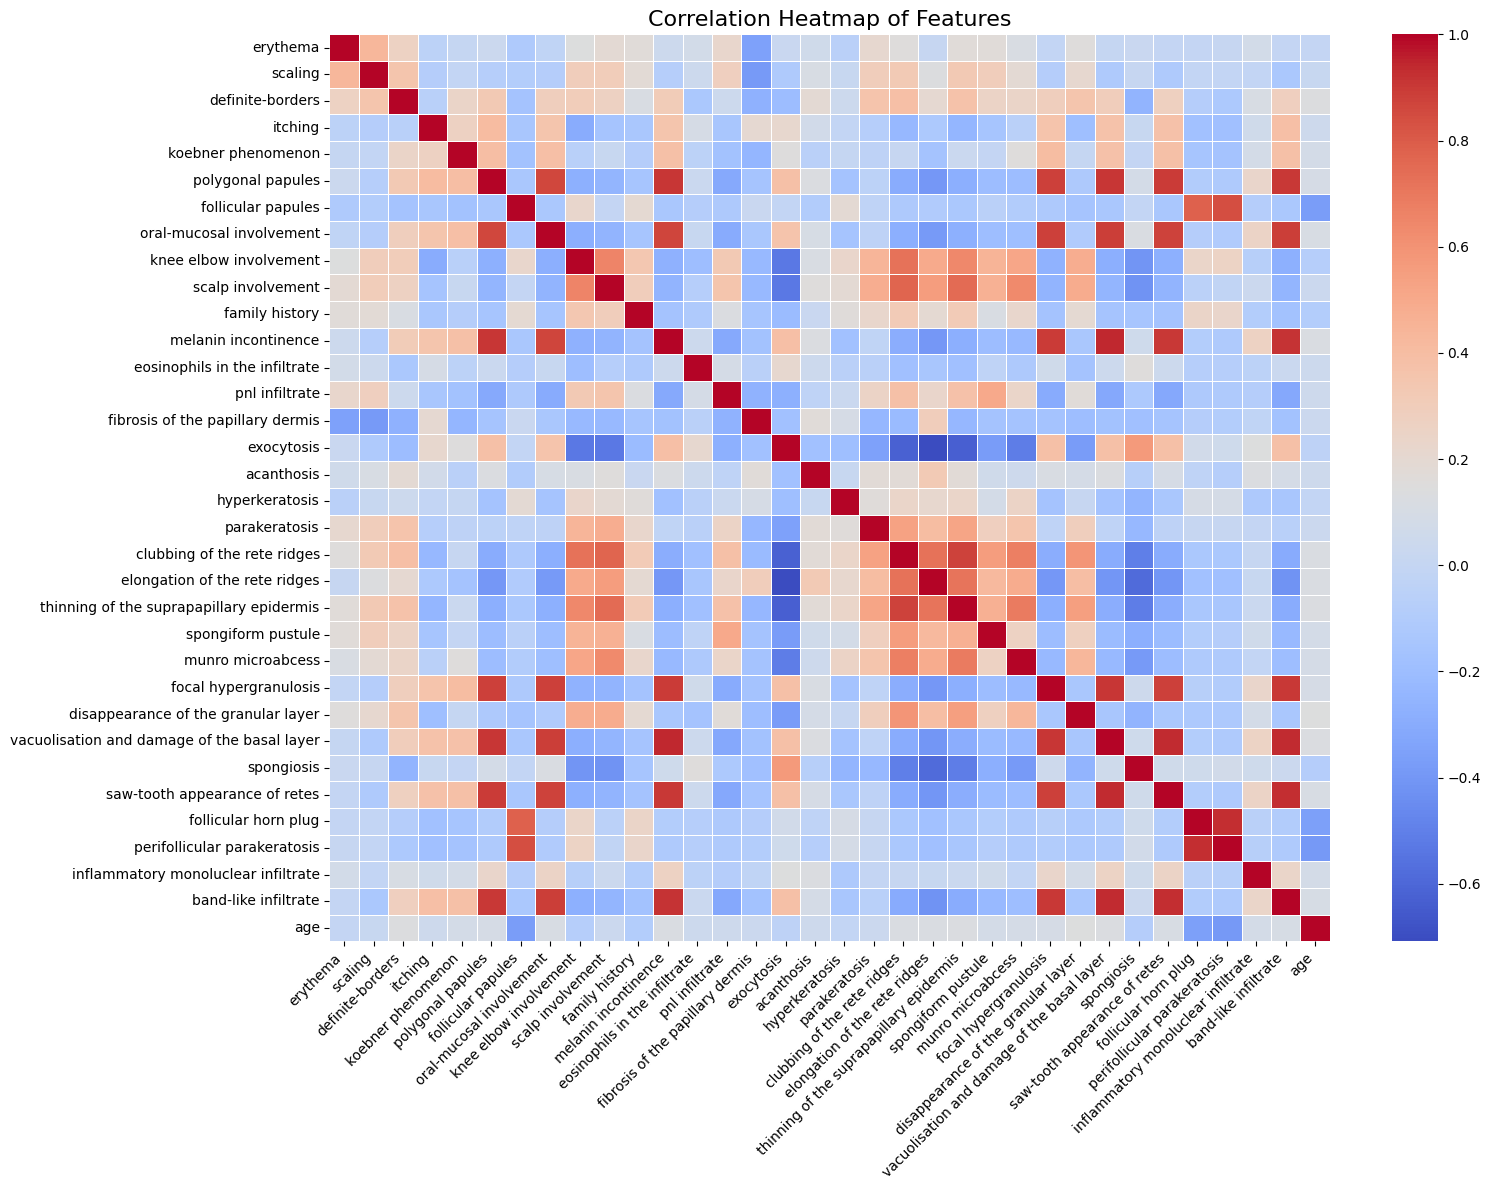

In [18]:
# Calculate correlation matrix
corr_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=False, cmap="coolwarm", linewidths=0.5, linecolor='white')
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [19]:
#Correlation analysis
# Setting a threshold to identify highly correlated feature pairs (above 0.9)
threshold = 0.9

# Unstacking and sorting the correlation matrix to get feature pairs
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# Filtering out self-correlations (1.0) and duplicate pairs (e.g., A-B and B-A)
high_corr = corr_pairs[(corr_pairs < 1.0) & (corr_pairs > threshold)].drop_duplicates()

# Displaying feature pairs that exceed the correlation threshold
print("Highly correlated feature pairs:\n", high_corr)


Highly correlated feature pairs:
 vacuolisation and damage of the basal layer  melanin incontinence                           0.941659
saw-tooth appearance of retes                vacuolisation and damage of the basal layer    0.938397
vacuolisation and damage of the basal layer  band-like infiltrate                           0.937561
follicular horn plug                         perifollicular parakeratosis                   0.928929
saw-tooth appearance of retes                band-like infiltrate                           0.928748
band-like infiltrate                         melanin incontinence                           0.916848
vacuolisation and damage of the basal layer  polygonal papules                              0.911626
focal hypergranulosis                        vacuolisation and damage of the basal layer    0.909650
polygonal papules                            melanin incontinence                           0.907044
                                             band-like in

### 🔍 Multicollinearity Check

### 🔍 Multicollinearity Analysis

Since some features might be highly correlated (correlation > 0.9), multicollinearity was assessed to identify potentially redundant features.

Although several feature pairs exhibited strong correlations, all features were retained in the dataset. This decision is based on the use of a **Random Forest classifier**, which is a tree-based model and less sensitive to multicollinearity compared to linear models such as **logistic regression**. Random Forests mitigate this issue by selecting splits on one of the correlated features during tree construction.

Therefore, no feature removal was necessary based on the correlation analysis.



# Preprocessing and modeling

## ⚙️ Data Preprocessing and Pipeline Setup


In [20]:
# Split the dataset into training and test sets before any preprocessing to prevent data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y.values.ravel(), test_size=0.2, random_state=42, stratify=y
)

# ColumnTransformer to handle missing values specifically in the "age" feature
imputer = ColumnTransformer(
    transformers=[
        ("impute_age", SimpleImputer(strategy='median'), ["age"])  # Apply median imputation to "age"
    ],
    remainder='passthrough'  # Leave all other features unchanged
)

# Create a pipeline that includes the imputer and the Random Forest classifier
pipeline = Pipeline(steps=[
    ("imputer", imputer),
    ("classifier", RandomForestClassifier(random_state=42, class_weight="balanced"))
])



## 🏋️‍♂️ Model Training


In [21]:
# Fit the pipeline on the training data (imputation and model training happen together)
pipeline.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('imputer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_age',
                                                  SimpleImputer(strategy='median'),
                                                  ['age'])])),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

## 📊 Model Evaluation

In [22]:
# Predict the target values for the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model's performance using accuracy and classification report
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9594594594594594

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.91      0.83      0.87        12
           3       1.00      1.00      1.00        15
           4       0.82      0.90      0.86        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.96        74
   macro avg       0.95      0.96      0.95        74
weighted avg       0.96      0.96      0.96        74



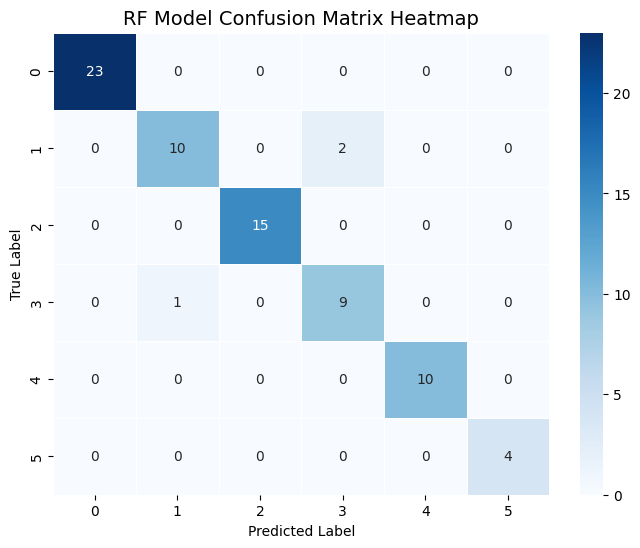

In [28]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, linecolor='white')
plt.title("RF Model Confusion Matrix Heatmap", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# ⚙️ Model Hyperparameter Tuning


To improve model performance, GridSearchCV is used to find the best hyperparameters for the Random Forest classifier. The tuning process is done inside the pipeline to ensure that imputation and model selection are both cross-validated properly.

In [24]:
# Define hyperparameter grid for Random Forest
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

# Wrap the pipeline inside GridSearchCV
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

# Perform grid search on training data
grid_search.fit(X_train, y_train)

# Display the best hyperparameters found
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 100}
Best Cross-Validation Accuracy: 0.9794272355347751


## Re-evaluation of optimized model

In [25]:
# Predict using the best found model
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test)

# Evaluate optimized model
print("\nOptimized Accuracy:", accuracy_score(y_test, y_pred_optimized))
print("\nOptimized Classification Report:\n", classification_report(y_test, y_pred_optimized))



Optimized Accuracy: 0.972972972972973

Optimized Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.92      0.92      0.92        12
           3       1.00      1.00      1.00        15
           4       0.90      0.90      0.90        10
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         4

    accuracy                           0.97        74
   macro avg       0.97      0.97      0.97        74
weighted avg       0.97      0.97      0.97        74



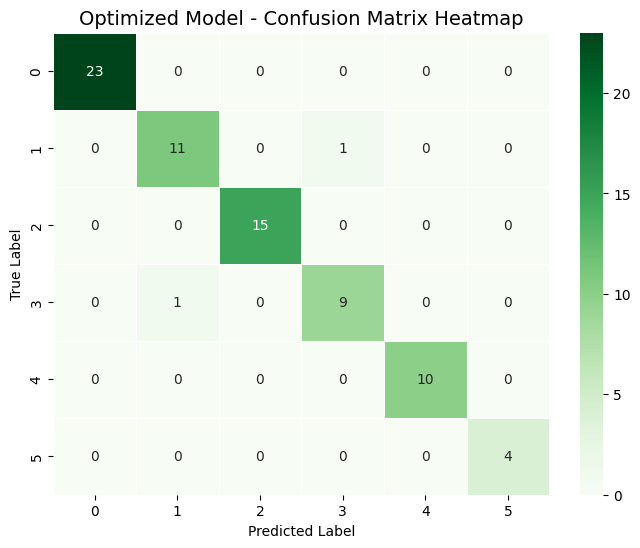

In [26]:
# Confusion matrix for optimized model
cm_optimized = confusion_matrix(y_test, y_pred_optimized)

# Plot the heatmap for optimized model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_optimized, annot=True, fmt="d", cmap="Greens", linewidths=0.5, linecolor='white')
plt.title("Optimized Model - Confusion Matrix Heatmap", fontsize=14)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


## 📊 Findings: Model Evaluation

Two versions of the Random Forest model were evaluated:

---

### **1️⃣ Initial Random Forest Model (non-optimized)**

- **Accuracy:** 95.9%
- The initial model performed well across all classes but showed slight drops in recall for specific categories:
  - **Class 2 recall:** 0.83
  - **Class 4 recall:** 0.90
- Misclassifications were primarily observed between **Class 2** and **Class 4**, as seen in the confusion matrix.
- Despite minor class imbalance, the model generalized well.

---

### **2️⃣ Optimized Random Forest Model (with hyperparameter tuning)**

- **Optimized Accuracy:** 97.3%
- After applying hyperparameter tuning via GridSearchCV:
  - **Class 2 recall** improved from **0.83 → 0.92**
  - **Class 4 recall** remained consistent at **0.90**
- Precision, recall, and f1-scores were generally higher or stable across all classes.
- The optimized model reduced misclassification errors compared to the initial model, leaving only one confusion between **Class 2** and **Class 4**.

---

### **💡 Key Insights**

- The optimized model showed improvements, especially for underperforming classes like **Class 2**.
- Both models demonstrated strong performance for rare classes, such as **Class 6**, achieving perfect precision and recall.
- The use of **Random Forest with `class_weight='balanced'`** effectively addressed class imbalance without requiring additional resampling techniques.


# Feature Importance Analysis

Feature importance analysis for each class label using SHAP technique

  0%|          | 0/50 [00:00<?, ?it/s]


Feature importance for Class 1:


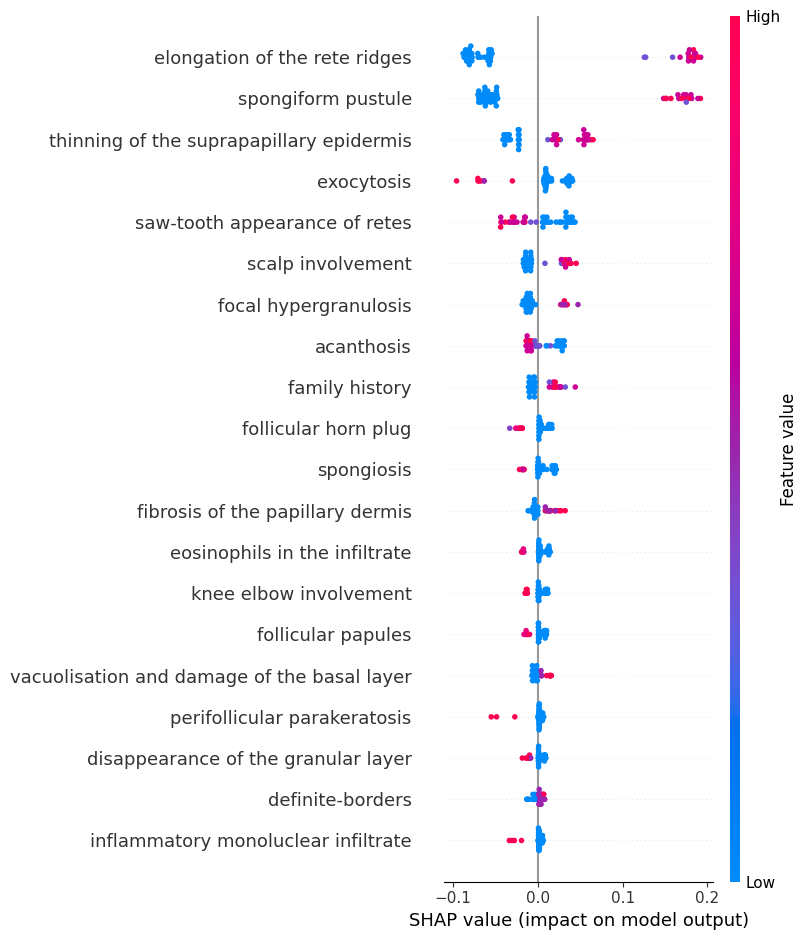


Feature importance for Class 2:


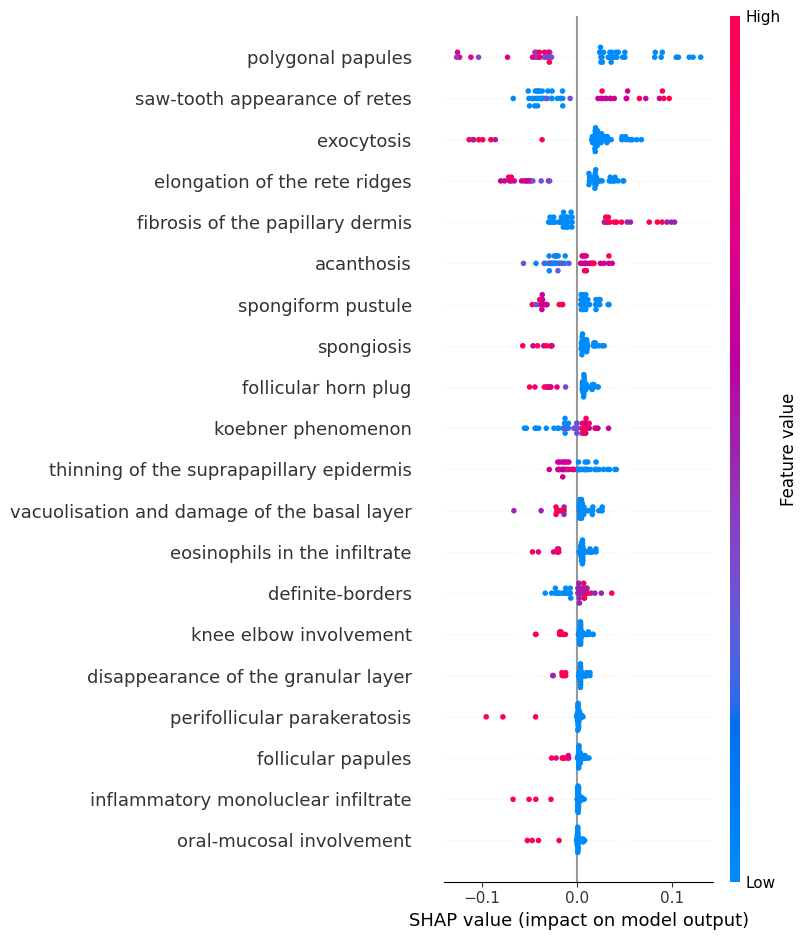


Feature importance for Class 3:


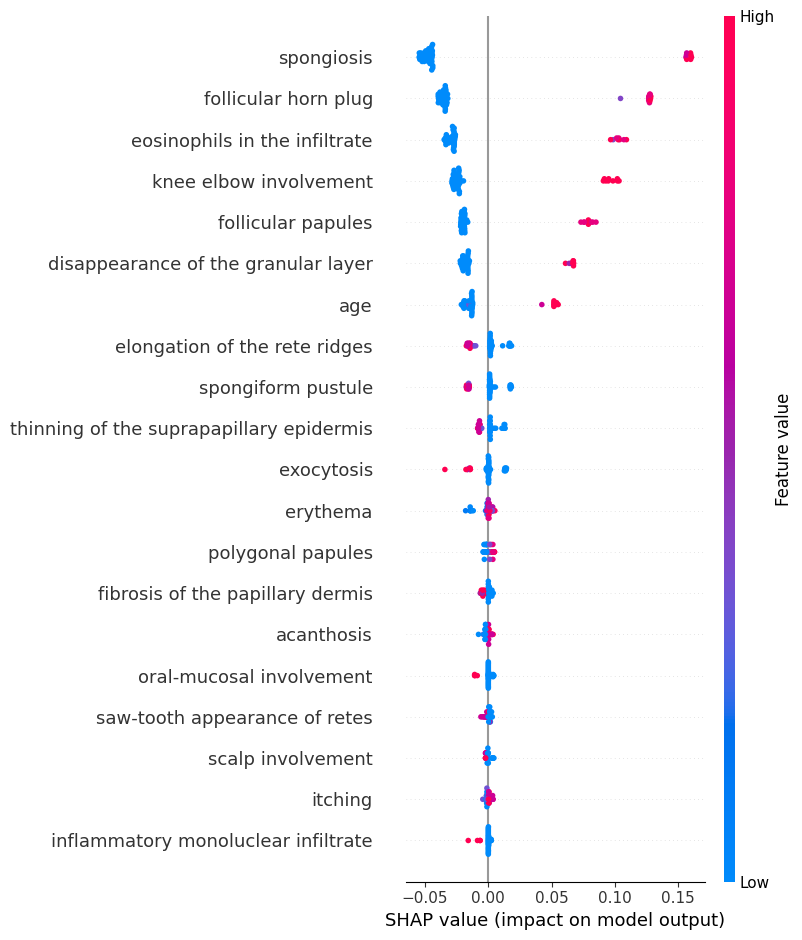


Feature importance for Class 4:


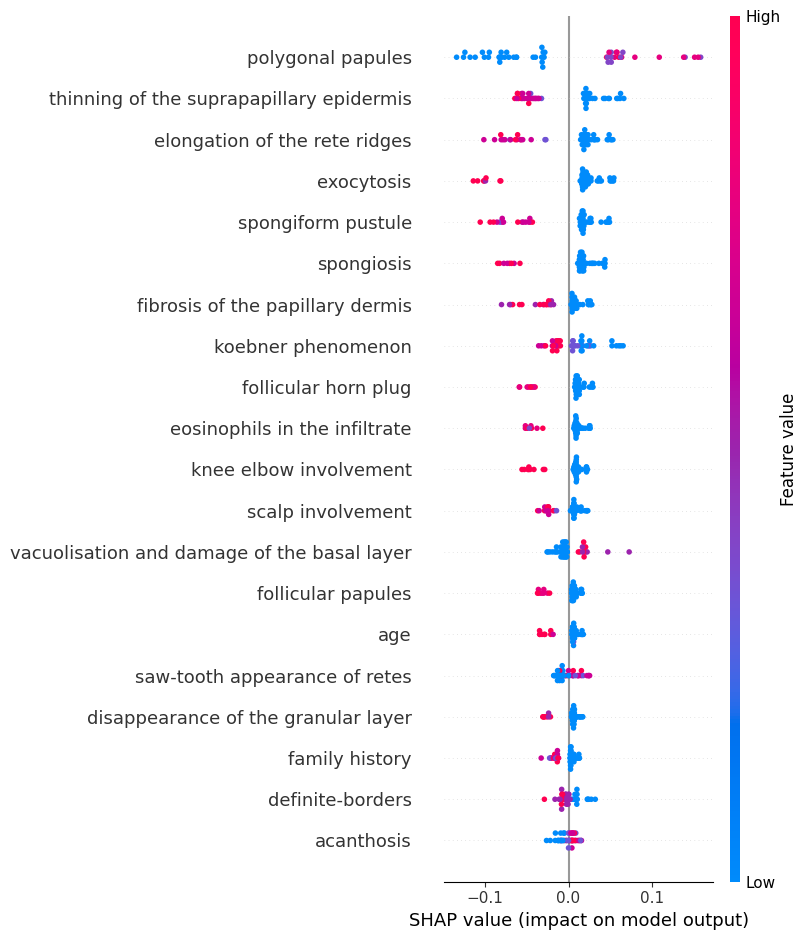


Feature importance for Class 5:


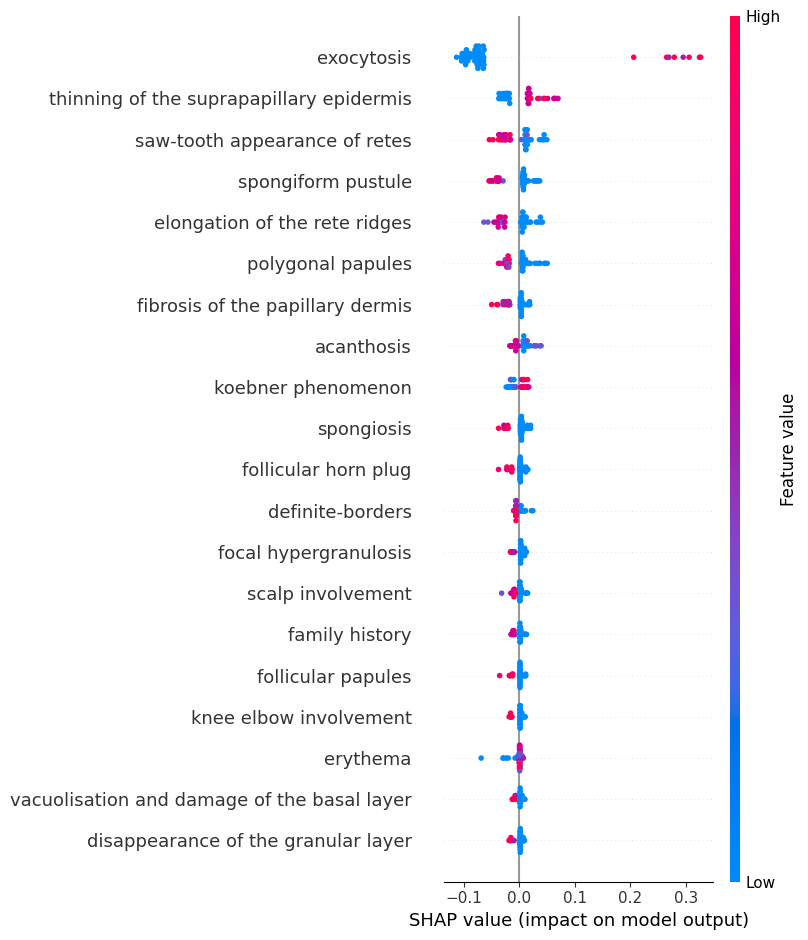


Feature importance for Class 6:


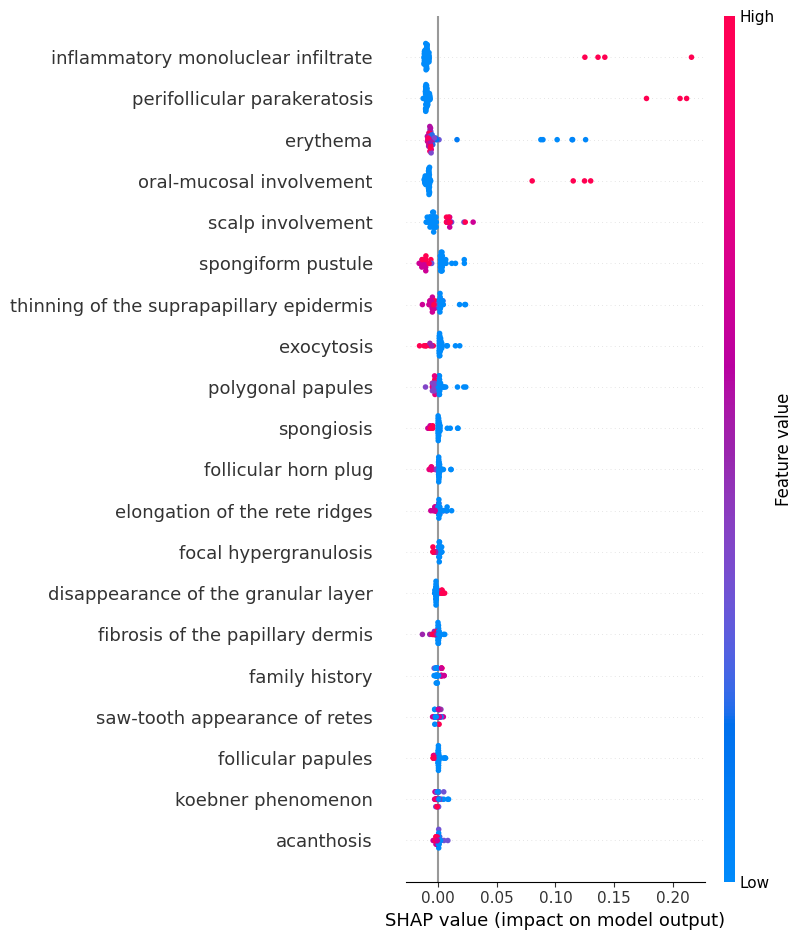

In [27]:
# Extract classifier from pipeline
rf_model = best_model.named_steps["classifier"]

# Apply imputer (same preprocessing as the pipeline)
X_train_imputed = best_model.named_steps["imputer"].transform(X_train[:50])
X_test_imputed = best_model.named_steps["imputer"].transform(X_test[:50])

# Explain only the classifier (not the pipeline)
explainer = shap.KernelExplainer(rf_model.predict_proba, X_train_imputed)

# Compute SHAP values
shap_values = explainer.shap_values(X_test_imputed)  # shape: (50, 34, 6)

# Rearrange axes: convert (samples, features, classes) -> (classes, samples, features)
shap_values = np.transpose(shap_values, (2, 0, 1))  # Now (6, 50, 34)

# Now SHAP is in correct format for plotting
for class_idx in range(shap_values.shape[0]):
    print(f"\nFeature importance for Class {class_idx + 1}:")
    shap.summary_plot(shap_values[class_idx], features=X_test_imputed, feature_names=X.columns)



## SHAP Interpretation